In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=2b49b7b6375f6cb59cd667c67f60f482736be7ed14230708d1cee1acc99045b9
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=f34b77dd02da883653279d19b5bb5676fba8622c4fe74ff446724243ca3d9a90
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.metrics import accuracy_score


**Question 1**

In [ ]:
# Read first CSV file into dataframe
unsplit_data = pd.read_csv('hw2_data.csv')

target = unsplit_data.iloc[:,0]
target = target.to_numpy()

split_data = unsplit_data.drop(unsplit_data.columns[0], axis=1)


In [ ]:
# Define the K values to test
k_values = [2, 4, 6, 8]

# Perform K-means clustering for each K value and compute ARI
for k in k_values:
    # Initialize KMeans with the current K value
    kmeans = KMeans(n_clusters=k, random_state=5)
    gmm = GaussianMixture(n_components=k, random_state=5)
    
    # Fit the KMeans model to the RNAseq data
    kmeans.fit(split_data)
    gmm.fit(split_data)
    
    # Compute the labels and ARI for the KMeans model
    k_labels = kmeans.labels_
    gmm_labels=gmm.predict(split_data)

    k_ari = adjusted_rand_score(target, k_labels)
    gmm_ari = adjusted_rand_score(target, gmm_labels)
    
    # Print the ARI for the current K value
    print(f'K={k}: K_means_ARI={k_ari}')
    print(f'K={k}: GMM_ARI={gmm_ari}')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2: K_means_ARI=1.0
K=2: GMM_ARI=1.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4: K_means_ARI=0.5515676921604334
K=4: GMM_ARI=0.9465048579250472


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6: K_means_ARI=0.7557152641331011
K=6: GMM_ARI=0.9427905588898094


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8: K_means_ARI=0.48590194641803525
K=8: GMM_ARI=0.5631246798852481


1.B) The kmeans model is significantly faster than gmm, and the time taken to finish the model is increased with k. In terms of accuracy, both models cluster perfectly at k of 2 because there are 2 subgroups. As you increase k, kmeans significantly drop ARI because it is not flexible and needs to clasify a third group, resulting in a loss of proper classification, whereas gmm is flexible and even though it classifies some as a third group, the majority of points are classified as one of the two proper cell types at least for k of 4 and 6.


**Question 4**

In [ ]:
pca = PCA(n_components=15)

pca.fit(split_data)

variance = pca.explained_variance_ratio_

print(pca.explained_variance_ratio_)

component_num = 0 
n_top_features = 5 
top_features = split_data.columns[np.argsort(np.abs(pca.components_[component_num]))[::-1]][:n_top_features]
print(f'The top {n_top_features} features for component {component_num+1}: {top_features}')


# The first principle component is the most important for representing the data
# because it's explained variance ration is significantly higher than all others

[0.03887003 0.00483696 0.0041728  0.00403546 0.0039557  0.00378642
 0.00368197 0.00358455 0.00352677 0.00349085 0.00346127 0.0034248
 0.00341225 0.00339862 0.003355  ]
The top 5 features for component 1: Index(['ENSG00000105369', 'ENSG00000156738', 'ENSG00000143546',
       'ENSG00000007312', 'ENSG00000100079'],
      dtype='object')


In [ ]:
pca = PCA()
pca.fit(split_data)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the first index where the cumulative explained variance ratio exceeds or equals 0.8
min_components_array = np.where(cumulative_var_ratio >= 0.8)[0]

if min_components_array.size > 0:
    min_components = min_components_array[0] + 1
    print(f"{min_components} principal components are needed to explain 80% of the variance in the data.")
else:
    print("None of the principal components reach 80% of the cumulative explained variance.")

# In order to determine the min number of PCs required to capture 80% of the 
# variance, I add the variance of every PC sequentially until the cumulative 
# value => 0.8 and then stop and return the index

398 principal components are needed to explain 80% of the variance in the data.


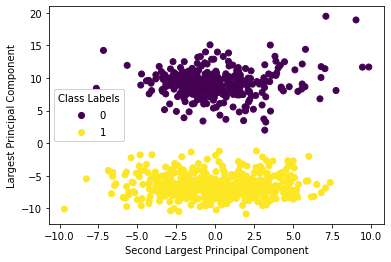

In [ ]:
# Apply PCA with 15 components
pca = PCA(15)
pca.fit(split_data)
principal_components = pca.transform(split_data)

# Extract the first two principal components for visualization
principal_components = principal_components[:, :2]

# Convert class labels into numeric values
unique_labels = np.unique(target)
label_map = {label: index for index, label in enumerate(unique_labels)}
numeric_labels = [label_map[label] for label in target]

# Scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(principal_components[:, 1], principal_components[:, 0], c=numeric_labels, cmap='viridis')

# Add axis labels
ax.set_xlabel('Second Largest Principal Component')
ax.set_ylabel('Largest Principal Component')

# Add a colorbar to show class labels
legend1 = ax.legend(*scatter.legend_elements(), title="Class Labels", loc="best")
ax.add_artist(legend1)

# Show the plot
plt.show()

# In this figure, cells of class 0 (B cells) have positive values in the largest component
# and are clustered typically around 0 in the second. Cells of class 1 (CD14 Monocytes)
# have negative values in the second largest component and are also clustered around 0

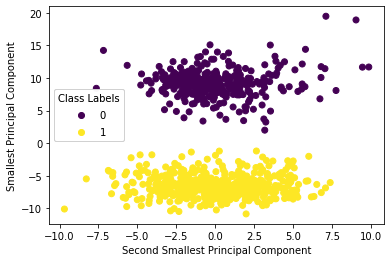

In [ ]:
# Extract the first two principal components for visualization
principal_components = principal_components[:, -2:]

# Convert class labels into numeric values
unique_labels = np.unique(target)
label_map = {label: index for index, label in enumerate(unique_labels)}
numeric_labels = [label_map[label] for label in target]

# Scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(principal_components[:, 1], principal_components[:, 0], c=numeric_labels, cmap='viridis')

# Add axis labels
ax.set_xlabel('Second Smallest Principal Component')
ax.set_ylabel('Smallest Principal Component')

# Add a colorbar to show class labels
legend1 = ax.legend(*scatter.legend_elements(), title="Class Labels", loc="best")
ax.add_artist(legend1)

# Show the plot
plt.show()

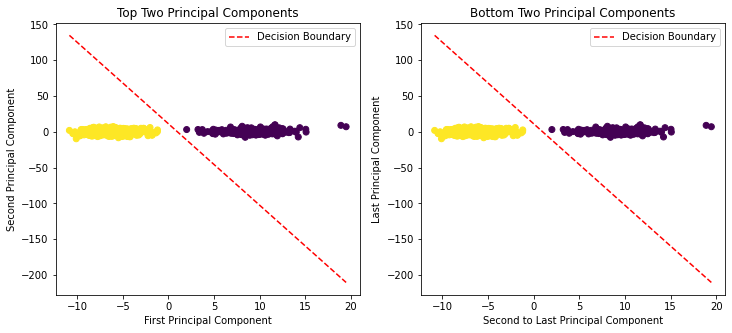

In [ ]:
# Extract the top two and bottom two principal components
top_two_components = principal_components[:, :2]
bottom_two_components = principal_components[:, -2:]

# Train logistic regression classifiers
top_lr = LogisticRegression()
top_lr.fit(top_two_components, target)

bottom_lr = LogisticRegression()
bottom_lr.fit(bottom_two_components, target)

# Create decision boundary functions
def decision_boundary_x(lr, x):
    return -(lr.coef_[0][0] * x + lr.intercept_[0]) / lr.coef_[0][1]

# Generate decision boundary lines
x_values = np.linspace(top_two_components[:, 0].min(), top_two_components[:, 0].max(), 100)
top_decision_boundary = decision_boundary_x(top_lr, x_values)
bottom_decision_boundary = decision_boundary_x(bottom_lr, x_values)

# Create scatter plots with decision boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Top two components plot
ax1.scatter(top_two_components[:, 0], top_two_components[:, 1], c=numeric_labels, cmap='viridis')
ax1.plot(x_values, top_decision_boundary, color='red', linestyle='--', label='Decision Boundary')
ax1.set_title('Top Two Principal Components')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Bottom two components plot
ax2.scatter(bottom_two_components[:, 0], bottom_two_components[:, 1], c=numeric_labels, cmap='viridis')
ax2.plot(x_values, bottom_decision_boundary, color='red', linestyle='--', label='Decision Boundary')
ax2.set_title('Bottom Two Principal Components')
ax2.set_xlabel('Second to Last Principal Component')
ax2.set_ylabel('Last Principal Component')

# Add legends
ax1.legend()
ax2.legend()

plt.show()

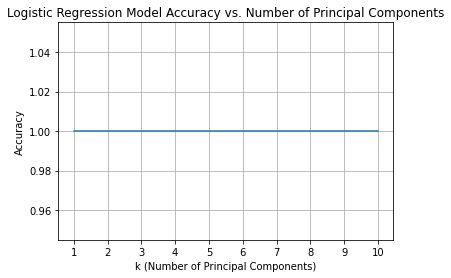

In [ ]:
# Apply PCA on the entire dataset
pca = PCA(n_components=10)
pca.fit(split_data)
data_pca = pca.transform(split_data)

# Train logistic regression models and evaluate their accuracies
accuracies = []
for k in range(1, 11):
    # Train logistic regression model
    lr = LogisticRegression()
    lr.fit(data_pca[:, :k], target)

    # Evaluate the model's accuracy
    y_pred = lr.predict(data_pca[:, :k])
    accuracy = accuracy_score(target, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies
plt.plot(range(1, 11), accuracies)
plt.xlabel('k (Number of Principal Components)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Model Accuracy vs. Number of Principal Components')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# This shows that all of the variance can be explained by a signal principle
# component, because even with one PC, the classification is perfect.

**Question 5**

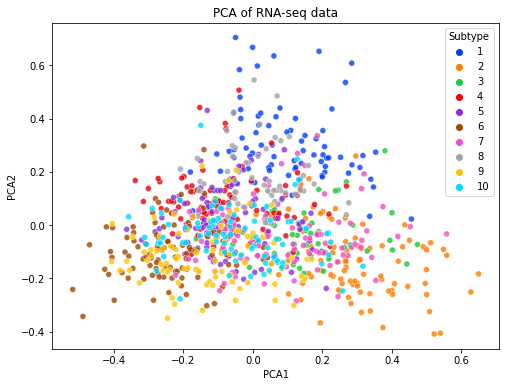

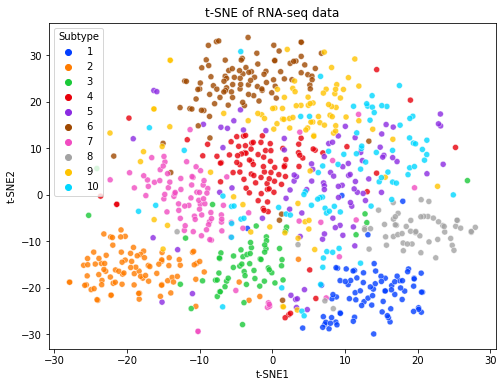

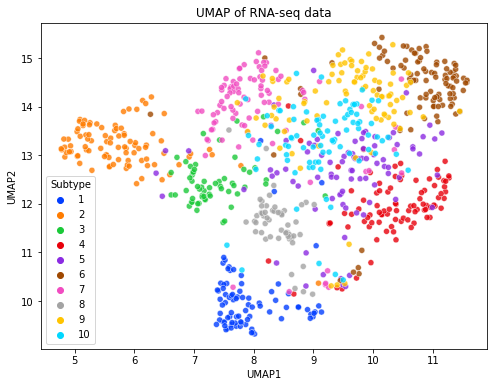

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (ARI): 0.38220360510429013


In [ ]:
rna_seq_data = pd.read_csv("A3RNAseq.csv", index_col=0, nrows=832)
labels = pd.read_csv("label.csv", nrows=832)

# PCA
pca = PCA(n_components=2)
rna_pca = pca.fit_transform(rna_seq_data)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
rna_tsne = tsne.fit_transform(rna_seq_data)

# UMAP
umap = UMAP(n_components=2, random_state=42)
rna_umap = umap.fit_transform(rna_seq_data)

df_pca = pd.DataFrame(rna_pca, columns=["PCA1", "PCA2"]).assign(Subtype=labels['label'].values)
df_tsne = pd.DataFrame(rna_tsne, columns=["t-SNE1", "t-SNE2"]).assign(Subtype=labels['label'].values)
df_umap = pd.DataFrame(rna_umap, columns=["UMAP1", "UMAP2"]).assign(Subtype=labels['label'].values)

def plot_2d(data, x_col, y_col, hue_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette="bright", legend="full", alpha=0.8)
    plt.title(title)
    plt.show()

plot_2d(df_pca, "PCA1", "PCA2", "Subtype", "PCA of RNA-seq data")
plot_2d(df_tsne, "t-SNE1", "t-SNE2", "Subtype", "t-SNE of RNA-seq data")
plot_2d(df_umap, "UMAP1", "UMAP2", "Subtype", "UMAP of RNA-seq data")

# Run k-means clustering with k = 10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(rna_seq_data)

ground_truth_labels = labels['label'].values

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(ground_truth_labels, kmeans_clusters)
print("Adjusted Rand Index (ARI):", ari)


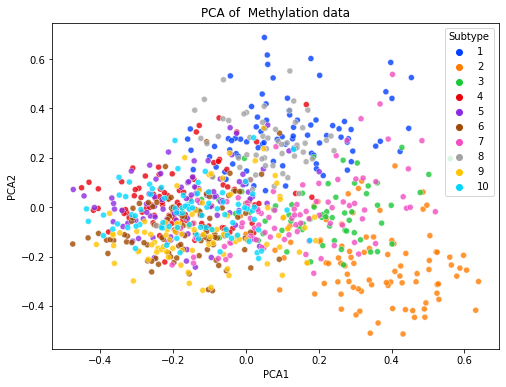

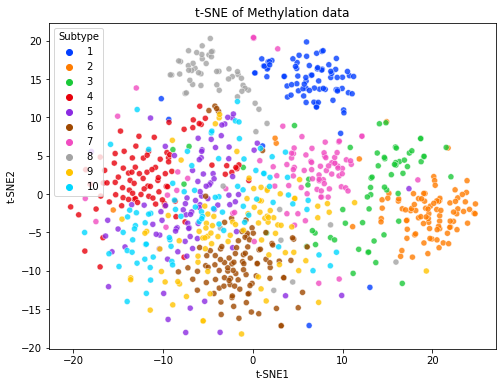

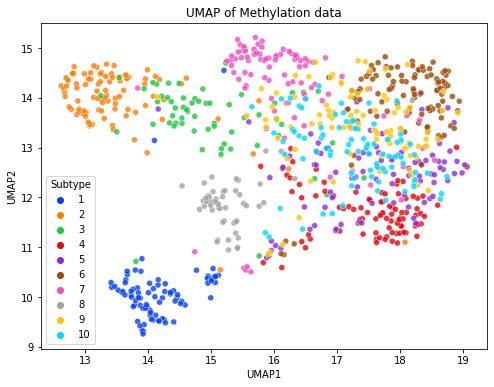

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (ARI): 0.40215339095219194


In [ ]:
methylation_data = pd.read_csv("A3Methylation.csv", index_col=0, nrows=832)
labels = pd.read_csv("label.csv", nrows=832)

# PCA
pca = PCA(n_components=2)
meth_pca = pca.fit_transform(methylation_data)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
meth_tsne = tsne.fit_transform(methylation_data)

# UMAP
umap = UMAP(n_components=2, random_state=42)
meth_umap = umap.fit_transform(methylation_data)

df_pca = pd.DataFrame(meth_pca, columns=["PCA1", "PCA2"]).assign(Subtype=labels['label'].values)
df_tsne = pd.DataFrame(meth_tsne, columns=["t-SNE1", "t-SNE2"]).assign(Subtype=labels['label'].values)
df_umap = pd.DataFrame(meth_umap, columns=["UMAP1", "UMAP2"]).assign(Subtype=labels['label'].values)

plot_2d(df_pca, "PCA1", "PCA2", "Subtype", "PCA of  Methylation data")
plot_2d(df_tsne, "t-SNE1", "t-SNE2", "Subtype", "t-SNE of Methylation data")
plot_2d(df_umap, "UMAP1", "UMAP2", "Subtype", "UMAP of Methylation data")

# Run k-means clustering with k = 10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(methylation_data)

ground_truth_labels = labels['label'].values

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(ground_truth_labels, kmeans_clusters)
print("Adjusted Rand Index (ARI):", ari)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


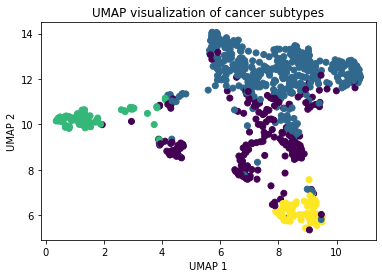

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AMI score for k-means with k=10: 0.6611


In [ ]:
# Combine RNA-seq and Methylation data
combined_data = pd.concat([pd.DataFrame(rna_seq_data), pd.DataFrame(methylation_data)], axis=1)

# Dimensionality reduction
pca = PCA(n_components=50) # Adjust the number of components as needed
pca_data = pca.fit_transform(combined_data)

# Unsupervised clustering
kmeans = KMeans(n_clusters=4) # Adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(pca_data)

# Visualization using UMAP
umap_model = UMAP()
umap_embeddings = umap_model.fit_transform(pca_data)

# Create a 2-D scatter plot
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP visualization of cancer subtypes')
plt.show()

# K-means clustering with k=10
kmeans_10 = KMeans(n_clusters=10)
cluster_labels_10 = kmeans_10.fit_predict(pca_data)

# Calculate Adjusted Mutual Information (AMI) score
ami_score = adjusted_mutual_info_score(labels['label'].values, cluster_labels_10)

print(f"AMI score for k-means with k=10: {ami_score:.4f}")

**Question 6**